# Importing Packages

In [103]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler

# Loading data

In [117]:
file_path = "C:\\Users\\manop\\Dropbox\\PC\\Downloads\\iris.csv"
#loading data
iris = pd.read_csv(file_path)
df = pd.DataFrame(iris)
df.head(100)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
95,5.7,3.0,4.2,1.2,Versicolor
96,5.7,2.9,4.2,1.3,Versicolor
97,6.2,2.9,4.3,1.3,Versicolor
98,5.1,2.5,3.0,1.1,Versicolor


# Analyzing and Visualizing the data

In [105]:
#basic analysis of data
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


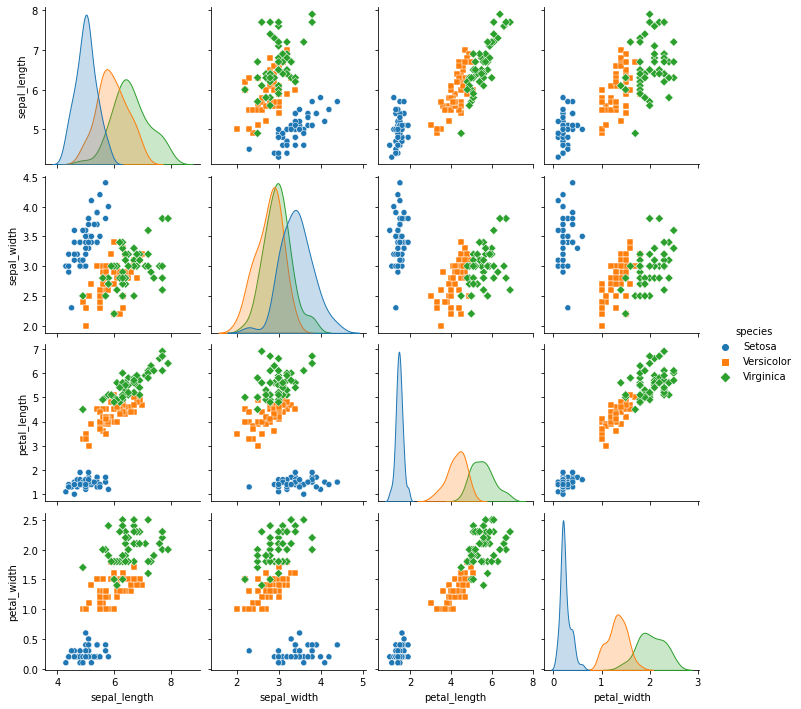

In [106]:
# Visualize the dataset
sns.pairplot(iris, hue="species", markers=["o", "s", "D"])
plt.show()

In [107]:
data = iris.values
X = data[:,0:4]
Y = data[:,4]

In [108]:
Y_Data = np.array([np.average(X[:, i][Y==j].astype('float32')) for i in range (X.shape[1])
 for j in (np.unique(Y))])
Y_Data_reshaped = Y_Data.reshape(4, 3)
Y_Data_reshaped = np.swapaxes(Y_Data_reshaped, 0, 1)
X_axis = np.arange(len(columns)-1)
width = 0.25

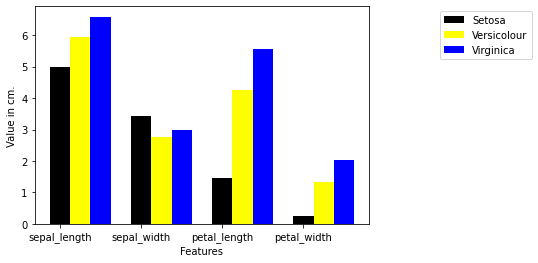

In [124]:
plt.bar(X_axis, Y_Data_reshaped[0], width, label = 'Setosa',color="black")
plt.bar(X_axis+width, Y_Data_reshaped[1], width, label = 'Versicolour', color="yellow")
plt.bar(X_axis+width*2, Y_Data_reshaped[2], width, label = 'Virginica', color="blue")
plt.xticks(X_axis, columns[:4])
plt.xlabel("Features")
plt.ylabel("Value in cm.")
plt.legend(bbox_to_anchor=(1.5,1))
plt.show()

# Training the Dataset

In [110]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

# Building and Evaluating the Model

In [111]:
svn = SVC()
svn.fit(X_train, y_train)

SVC()

In [112]:
predictions = svn.predict(X_test)
# Calculate the accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predictions)

1.0

In [113]:
# A detailed classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        11
  Versicolor       1.00      1.00      1.00         9
   Virginica       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



# Testing the dataset

In [119]:
X_new = np.array([[ 5.7,2.8,4.1,1.3], [  5.0,3.6,1.4,0.2], [  5.3, 2.5, 4.6, 1.9 ]])
#Prediction of the species from the input vector
prediction = svn.predict(X_new)
print("Species are: {}".format(prediction))

Species are: ['Versicolor' 'Setosa' 'Virginica']
